In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

# Check the availability of GPU

In [2]:
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Ensure Training on GPU

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


# Mount the drive and set the path

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/11. NN_Classification_Keras

/content/drive/MyDrive/11. NN_Classification_Keras


# Import the dataset

In [6]:
import pandas as pd

data = pd.read_csv('mnist_train.csv')

In [7]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data.shape

(60000, 785)

# Transforming the data into Numpy array and Extracting only 10000 samples

In [9]:
data = np.array(data)
data = data[0:10000,:] # Extracting first 10000 samples

# Extracting Features and Labels

In [10]:
X = data[:,1:]
y = data[:,0]

In [11]:
X.shape

(10000, 784)

In [12]:
y.shape

(10000,)

In [13]:
y

array([5, 0, 4, ..., 6, 9, 7])

# Visualizing Few Samples

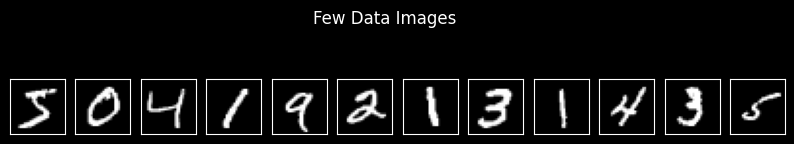

In [14]:
fig,axs = plt.subplots(1,12,figsize=(10,2))

for i in range(12):
  axs[i].imshow(X[i,:].reshape(28,28) ,cmap='gray')
  axs[i].set_xticks([]), axs[i].set_yticks([])

plt.suptitle('Few Data Images')
plt.show()

# Perform Train Test Split and Normalize the data

In [15]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.1)

In [16]:
train_data = train_data/np.max(train_data)
test_data  = test_data/np.max(test_data)

In [ ]:
# X = X/np.max(X)

# Create the Neural Network model

In [17]:
model = Sequential()
model.add(Dense(units = 64, input_shape =(784, ), activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 10, activation = 'sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 53706 (209.79 KB)
Trainable params: 53706 (209.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9) ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train and Test the model

In [20]:
hist = model.fit(x = train_data,
                 y = train_labels,
                 epochs = 101,
                 batch_size = 32,
                 validation_data = (test_data, test_labels), verbose=1
                    )

Epoch 1/101
282/282 [==============================] - 4s 6ms/step - loss: 0.8485 - accuracy: 0.7386 - val_loss: 0.3683 - val_accuracy: 0.8920
Epoch 2/101
282/282 [==============================] - 1s 5ms/step - loss: 0.3033 - accuracy: 0.9127 - val_loss: 0.3255 - val_accuracy: 0.9060
Epoch 3/101
282/282 [==============================] - 1s 4ms/step - loss: 0.2196 - accuracy: 0.9349 - val_loss: 0.2647 - val_accuracy: 0.9330
Epoch 4/101
282/282 [==============================] - 1s 3ms/step - loss: 0.1610 - accuracy: 0.9504 - val_loss: 0.2455 - val_accuracy: 0.9320
Epoch 5/101
282/282 [==============================] - 1s 3ms/step - loss: 0.1318 - accuracy: 0.9597 - val_loss: 0.2532 - val_accuracy: 0.9260
Epoch 6/101
282/282 [==============================] - 1s 3ms/step - loss: 0.1108 - accuracy: 0.9660 - val_loss: 0.2871 - val_accuracy: 0.9190
Epoch 7/101
282/282 [==============================] - 1s 3ms/step - loss: 0.0907 - accuracy: 0.9734 - val_loss: 0.2524 - val_accuracy: 0.9390

In [21]:
# hist = model.fit(x = X,
#                     y = y,
#                     epochs = 101,
#                     batch_size = 32,
#                     validation_split = 0.2,
#                      verbose=1
#                     )

# Print the attribute history ( a dictionary ) of object hist.

In [22]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [23]:
trainAcc = [100 * x for x in hist.history['accuracy']]
testAcc = [100 * x for x in hist.history['val_accuracy']]

# Visualizing the Loss and Accuracies

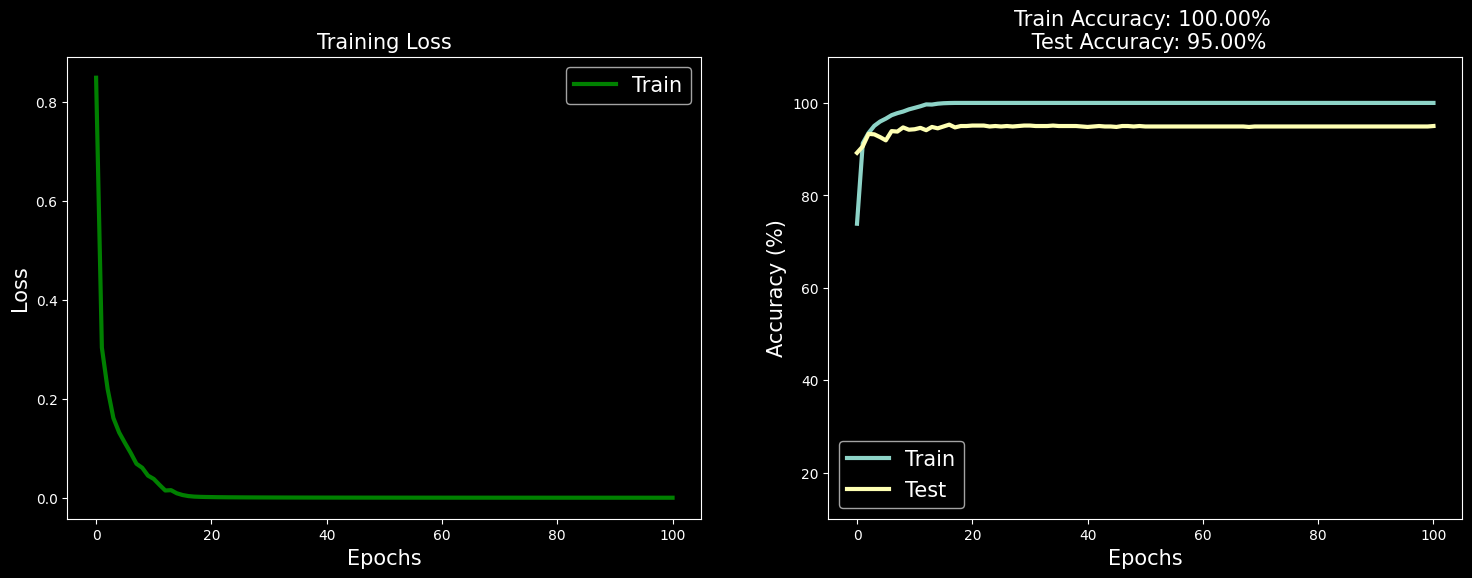

In [24]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(hist.history['loss'], 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)


ax[1].plot(trainAcc, label ='Train', lw = 3)
ax[1].plot(testAcc, label ='Test', lw = 3)
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim([10,110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()

# Save the Trained Model

In [25]:
model.save('mnist_TF.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Load the Save Model

In [26]:
from keras.models import load_model
classifier = load_model('mnist_TF.h5')

# Test the Loaded Model

In [27]:
y_pred = classifier.predict(test_data)

32/32 [==============================] - 0s 2ms/step


In [ ]:
#np.argmax(y_pred, axis = 1)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_labels, np.argmax(y_pred, axis = 1)))
print(" ")
print(" ")
print(confusion_matrix(test_labels, np.argmax(y_pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       102
           1       0.98      0.99      0.99       115
           2       0.85      0.95      0.90       118
           3       0.89      0.89      0.89       106
           4       0.88      0.98      0.93        96
           5       0.89      0.95      0.92        82
           6       0.98      0.87      0.92       102
           7       0.94      0.90      0.92        94
           8       0.92      0.91      0.92        92
           9       0.99      0.85      0.91        93

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000

 
 
[[ 98   0   0   0   0   1   2   1   0   0]
 [  0 114   1   0   0   0   0   0   0   0]
 [  0   0 112   2   1   1   0   0   2   0]
 [  1   0   6  94   0   4   0   0   1   0]
 [  0   1   0   0  94   0   0   0   1   0]
 [  0   0   1   2   0 